In [19]:
import pandas as pd
df = pd.read_csv('filtered_pitchers_over_500.csv')

In [20]:
df = df[df['pitcher'] == 665871]

In [21]:
df['is_ball'].describe()

count     2495
unique       2
top       True
freq      1265
Name: is_ball, dtype: object

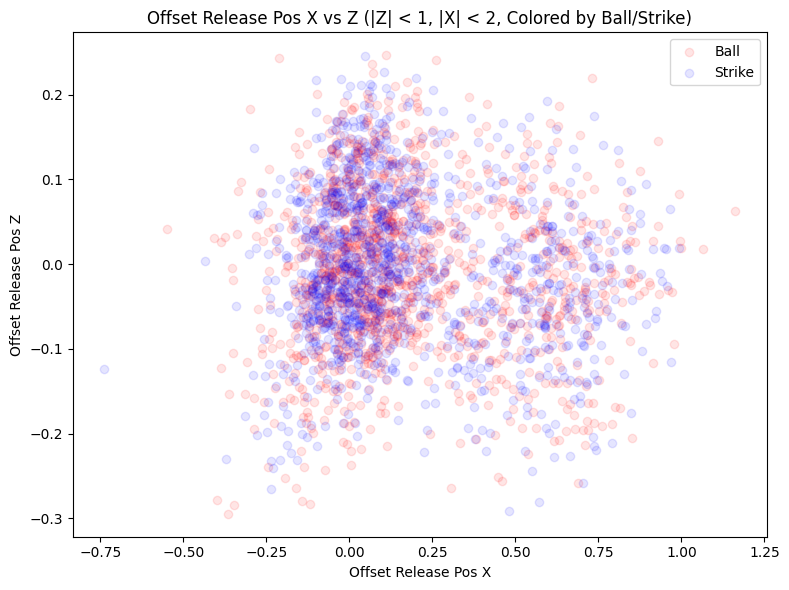

In [22]:
# Scatter plot: offset_release_pos_x vs offset_release_pos_z, colored by 'is_ball', filtered by |offset Z| < 1 and |offset X| < 2
import matplotlib.pyplot as plt

df_reg = df.dropna(subset=['offset_release_pos_x', 'offset_release_pos_z', 'is_ball'])
df_reg = df_reg[(df_reg['offset_release_pos_z'].abs() < 1) & (df_reg['offset_release_pos_x'].abs() < 2)]

X = df_reg['offset_release_pos_x'].values
Z = df_reg['offset_release_pos_z'].values
is_ball = df_reg['is_ball'].values

plt.figure(figsize=(8, 6))
for label, color in [(True, 'red'), (False, 'blue')]:
    mask = is_ball == label
    plt.scatter(X[mask], Z[mask], alpha=0.1, label='Ball' if label else 'Strike', color=color)
plt.xlabel('Offset Release Pos X')
plt.ylabel('Offset Release Pos Z')
plt.title('Offset Release Pos X vs Z (|Z| < 1, |X| < 2, Colored by Ball/Strike)')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
# Logistic regression to predict if a pitch is a ball based on X and Z offset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Drop NA values for the relevant columns
df_log = righties.dropna(subset=['offset_release_pos_x', 'offset_release_pos_z', 'is_ball'])

X_log = df_log[['offset_release_pos_x', 'offset_release_pos_z']].values
y_log = df_log['is_ball'].astype(int).values

logreg = LogisticRegression()
logreg.fit(X_log, y_log)

# Predict and evaluate
y_pred_log = logreg.predict(X_log)
y_prob_log = logreg.predict_proba(X_log)[:,1]

print('Classification Report:')
print(classification_report(y_log, y_pred_log))
print(f'ROC AUC Score: {roc_auc_score(y_log, y_prob_log):.4f}')
print(f'Equation: logit(P(ball)) = {logreg.intercept_[0]:.4f} + {logreg.coef_[0][0]:.4f} * offset_release_pos_x + {logreg.coef_[0][1]:.4f} * offset_release_pos_z')

NameError: name 'righties' is not defined

In [ ]:
# Logistic regression for lefties: predict if a pitch is a ball based on X and Z offset
df_log_left = lefties.dropna(subset=['offset_release_pos_x', 'offset_release_pos_z', 'is_ball'])
X_log_left = df_log_left[['offset_release_pos_x', 'offset_release_pos_z']].values
y_log_left = df_log_left['is_ball'].astype(int).values

logreg_left = LogisticRegression()
logreg_left.fit(X_log_left, y_log_left)

y_pred_log_left = logreg_left.predict(X_log_left)
y_prob_log_left = logreg_left.predict_proba(X_log_left)[:,1]

print('Lefties - Classification Report:')
print(classification_report(y_log_left, y_pred_log_left))
print(f'ROC AUC Score: {roc_auc_score(y_log_left, y_prob_log_left):.4f}')
print(f'Equation: logit(P(ball)) = {logreg_left.intercept_[0]:.4f} + {logreg_left.coef_[0][0]:.4f} * offset_release_pos_x + {logreg_left.coef_[0][1]:.4f} * offset_release_pos_z')

# Logistic regression for righties with absolute offset
df_log_abs = righties.dropna(subset=['offset_release_pos_x', 'offset_release_pos_z', 'is_ball']).copy()
df_log_abs['abs_offset_x'] = df_log_abs['offset_release_pos_x'].abs()
df_log_abs['abs_offset_z'] = df_log_abs['offset_release_pos_z'].abs()
X_log_abs = df_log_abs[['abs_offset_x', 'abs_offset_z']].values
y_log_abs = df_log_abs['is_ball'].astype(int).values

logreg_abs = LogisticRegression()
logreg_abs.fit(X_log_abs, y_log_abs)

y_pred_log_abs = logreg_abs.predict(X_log_abs)
y_prob_log_abs = logreg_abs.predict_proba(X_log_abs)[:,1]

print('\nRighties (absolute offset) - Classification Report:')
print(classification_report(y_log_abs, y_pred_log_abs))
print(f'ROC AUC Score: {roc_auc_score(y_log_abs, y_prob_log_abs):.4f}')
print(f'Equation: logit(P(ball)) = {logreg_abs.intercept_[0]:.4f} + {logreg_abs.coef_[0][0]:.4f} * abs_offset_x + {logreg_abs.coef_[0][1]:.4f} * abs_offset_z')

Lefties - Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.00      0.00      1368
           1       0.53      1.00      0.69      1553

    accuracy                           0.53      2921
   macro avg       0.39      0.50      0.35      2921
weighted avg       0.40      0.53      0.37      2921

ROC AUC Score: 0.5100
Equation: logit(P(ball)) = 0.1411 + 0.2159 * offset_release_pos_x + -0.0479 * offset_release_pos_z

Righties (absolute offset) - Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.62      0.56    229470
           1       0.51      0.40      0.45    229228

    accuracy                           0.51    458698
   macro avg       0.51      0.51      0.50    458698
weighted avg       0.51      0.51      0.50    458698


Righties (absolute offset) - Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.